In [10]:
import numpy as np
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt
import scipy.stats as sps

In [11]:
ticker = ['SOL-USD']
start= '2014-07-31'
end= '2024-08-31'
max_t = 64 #max trials
prices= yf.download(ticker, start, end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [12]:
returns= prices.pct_change()[1:]
n = len(returns)
var_0= returns.var()
var_ratio_output= pd.DataFrame()
for t in np.arange(2, max_t+1):
    var= returns.rolling(t).sum().var()
    var_ratio= var/(var_0*t) - 1
    std_error= (2*(2*t - 1)*(t-1)/(3*t*n))**(1/2)
    z_stat= var_ratio/std_error
    p_value= 2*(1 - sps.norm.cdf(abs(z_stat)))
    var_ratio_output[t]= [round(var_0, 6), round(var, 6), round(var_ratio, 4), round(std_error, 4), 
                          round(z_stat, 4), p_value]

the market is trending


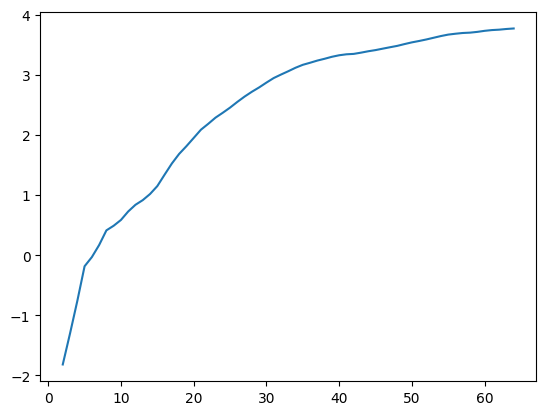

In [13]:
plt.plot(var_ratio_output.iloc[4])
min_pvalue= min(var_ratio_output.iloc[5])
max_z_stat= var_ratio_output.iloc[4][var_ratio_output.iloc[5] == min_pvalue].values[0]
chow_test= 1 - (1- min_pvalue)**(max_t)
if chow_test > 0.1:
    print('the market is efficient')
elif max_z_stat > 0:
    print('the market is trending')
else:
    print('the market is mean-reverting')